In [0]:
import matplotlib.pyplot as plt
import numpy as np
import scipy

from numpy.linalg import norm
from scipy.sparse import linalg
from sklearn.cluster import KMeans

In [0]:
def spectral_clustering(A, K, seed):
    # Calculate Laplacian
    D = np.zeros(A.shape)
    w = np.sum(A, axis=0)
    D.flat[::len(w) + 1] = w ** (-0.5)
    L = D.dot(A).dot(D)
    
    # Calculate Eigen Values
    e_val, e_vect = linalg.eigs(L, K)
    X = e_vect.real
    X_norm = norm(X, axis=1, ord=2)
    Y = (X.T / X_norm).T
    
    # Cluster
    kmeans = KMeans(n_clusters=K, random_state=seed)
    return kmeans.fit(X).labels_    

In [0]:
def gen_aff(X):
    N = X.shape[0]
    ans = np.zeros((N, N))
    sig = []
    for i in range(N):
        dists = []
        for j in range(N):
            dists.append(norm(X[i] - X[j]))
        dists.sort()
        sig.append(np.mean(dists[:5]))

    for i in range(N):
        for j in range(N):
            dist = norm(X[i] - X[j]) ** 2
            ans[i][j] = np.exp(- dist / (2 * sig[i] * sig[j]))
    return ans

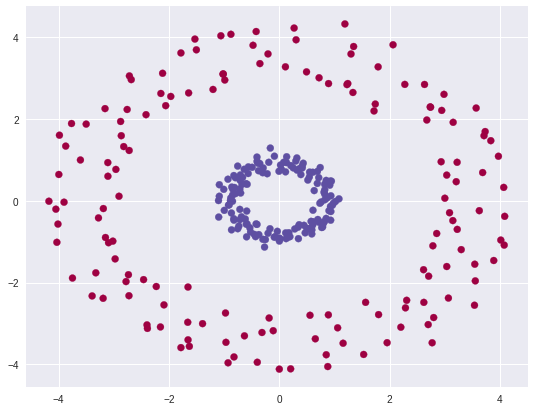

In [0]:
from sklearn.datasets import make_moons, make_circles, make_blobs

#X_mn, y_mn = make_blobs(n_samples=200, centers=5, cluster_std=1.0)
#X_mn, y_mn = make_moons(n_samples=150, noise=0.1)

X_mn1, y_mn1 = make_circles(n_samples=150, noise=0.1)
X_mn2, y_mn2 = make_circles(n_samples=150, noise=0.05)

X_mn2 = np.array(X_mn2)*4
y_mn2 = np.array(y_mn2)

X_mn = np.concatenate((X_mn1,X_mn2), axis = 0)
y_mn = np.append(y_mn1, y_mn2)


K = 2
A = gen_aff(X_mn)
Y = spectral_clustering(A, K, seed=1111)

cmap = 'Spectral'
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(X_mn[:, 0], X_mn[:, 1], c=Y, cmap=cmap)